# EOF Analysis of SST Anomalies: Understanding Modes of Variability in Climate Data

Empirical Orthogonal Function (EOF) analysis is a great tool (personal opinion) used in climate science to identify patterns of variability in time-series data. By decomposing a dataset into orthogonal modes, EOF analysis helps to isolate the dominant spatial and temporal patterns that explain the largest portions of variance in the data. The method identifies the most significant patterns in a dataset, both spatially and temporally, by transforming the data into new variables, called EOFs (spatial patterns) and Principal Components (PCs) (temporal patterns).


EOF analysis is widely used in climate science to study the variability in large-scale datasets, such as sea surface temperatures (SST), atmospheric pressure fields, or precipitation. The technique helps to isolate dominant modes of variability, such as the El Niño-Southern Oscillation (ENSO), North Atlantic Oscillation (NAO), and other large-scale phenomena that influence global and regional climates.


### How does EOF analysis work?

EOF analysis seeks to break down a dataset into a series of orthogonal (uncorrelated) modes that explain the most variance in the data. These modes can be understood as the principal patterns of variability that are present in the data:

- EOFs (Empirical Orthogonal Functions) represent the spatial patterns of variability.  
- PCs (Principal Components) represent the corresponding temporal evolution of these patterns.  

Each mode (EOF + PC pair) explains a certain fraction of the total variance in the dataset. The first mode captures the largest amount of variance, followed by the second mode, and so on. By identifying the leading EOFs, we can understand the dominant climate patterns affecting a particular region or globally.


### Why is it important?

EOF analysis allows climate scientists to extract the main modes of variability from complex datasets and to reduce the dimensionality of the data, making it easier to analyze and interpret. It has been used extensively to study phenomena such as:

- ENSO: One of the most important modes of climate variability globally, affecting weather patterns across the planet.  
- North Atlantic Oscillation (NAO): An important driver of climate variability in the Northern Hemisphere, particularly over the North Atlantic and Europe.
- Pacific Decadal Oscillation (PDO): A long-term pattern of Pacific climate variability that influences ocean and atmospheric conditions over decades.

EOF analysis is also a useful tool for climate prediction, as it allows scientists to focus on the key modes of variability that drive climate change and weather patterns.

In [1]:

# import necessary libraries
import xarray as xr
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Library fpr EOF Analysis
from eofs.standard import Eof

import warnings
warnings.filterwarnings("ignore")


In this notebook, we use the eofs package, which provides an easy-to-use interface for calculating EOFs from climate data. The main advantage of using this toolbox is that it automates much of the underlying mathematics, making the analysis more accessible while maintaining flexibility for customization.

**Loading the Data**: 

We start by loading SST anomaly data we calculated during Session 6  using xarray. This dataset contains the monthly SST anomalies, which are deviations from the climatological mean.

In [2]:
#run the cell
sst_anom = xr.open_dataset('../Data/SST/SST_Anomalies.nc',use_cftime=True)
sst_anom

# If you are working with Binder or haven't calculated and saved the SST anomalies locally, you will receive an error message.
# Instead, uncomment the relevant lines in the next cell to retrieve the data from the cloud.

<xarray.Dataset> Size: 18MB
Dimensions:    (time: 288, nbnds: 2, lat: 89, lon: 180)
Coordinates:
  * time       (time) object 2kB 2000-01-01 00:00:00 ... 2023-12-01 00:00:00
    month      (time) int64 2kB ...
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 5kB ...
    sst        (time, lat, lon) float32 18MB ...
Attributes:
    description:  Detrended anomalies of all variables.

In [12]:
#import requests
## Define the cloud link
#url = 'https://cloud.hcu-hamburg.de/nextcloud/s/GR8cxr4fpeqLwyS/download' 

## Download the file
#filename = '../Data/SST/SST_Anomalies.nc'
#response = requests.get(url)

## Save the file locally
#with open(filename, 'wb') as file:
#    file.write(response.content)

## Now open the file using xarray
#sst_anom = xr.open_dataset(filename, use_cftime=True)
#sst_anom


**Calculating Weights**: To account for the spherical nature of the Earth, we apply cosine latitude weights. These weights ensure that regions near the poles, which are spatially smaller on the globe, are not overrepresented in the analysis.

In [3]:
# run the cell
weights   = np.cos(np.deg2rad(sst_anom.lat)).values
weights   = weights.reshape(len(weights), 1)

**EOF Computation**: 

We use the Eof class from the eofs package to compute the EOFs and their corresponding Principal Components (PCs). The eofs package handles the matrix operations and provides us with easy access to the EOFs, PCs, explained variance, and eigenvalues.

In [4]:
# run the cell
solver = Eof(sst_anom['sst'].values, weights=weights)
eof_sst = solver.eofs(neofs=5)
pc_sst  = solver.pcs(npcs=5, pcscaling=0)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()

The shape of the computed eof_sst array confirms that we have calculated the spatial patterns for the first 5 modes, each of which corresponds to a distinct mode of variability.

In [5]:
eof_sst.shape

(5, 89, 180)

**Visualizing the Results**:

 The EOFs represent the spatial patterns of variability, while the PCs represent the temporal variability associated with each EOF mode. We plot the first two EOFs and their corresponding PCs to visualize the dominant modes of variability in the dataset.

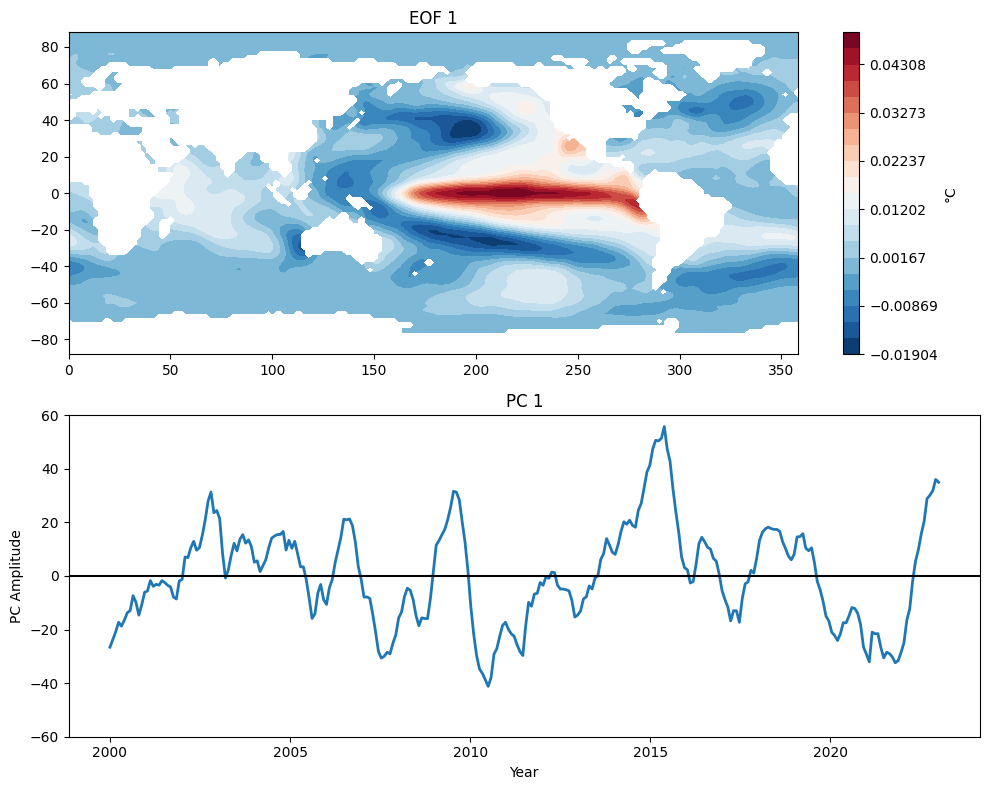

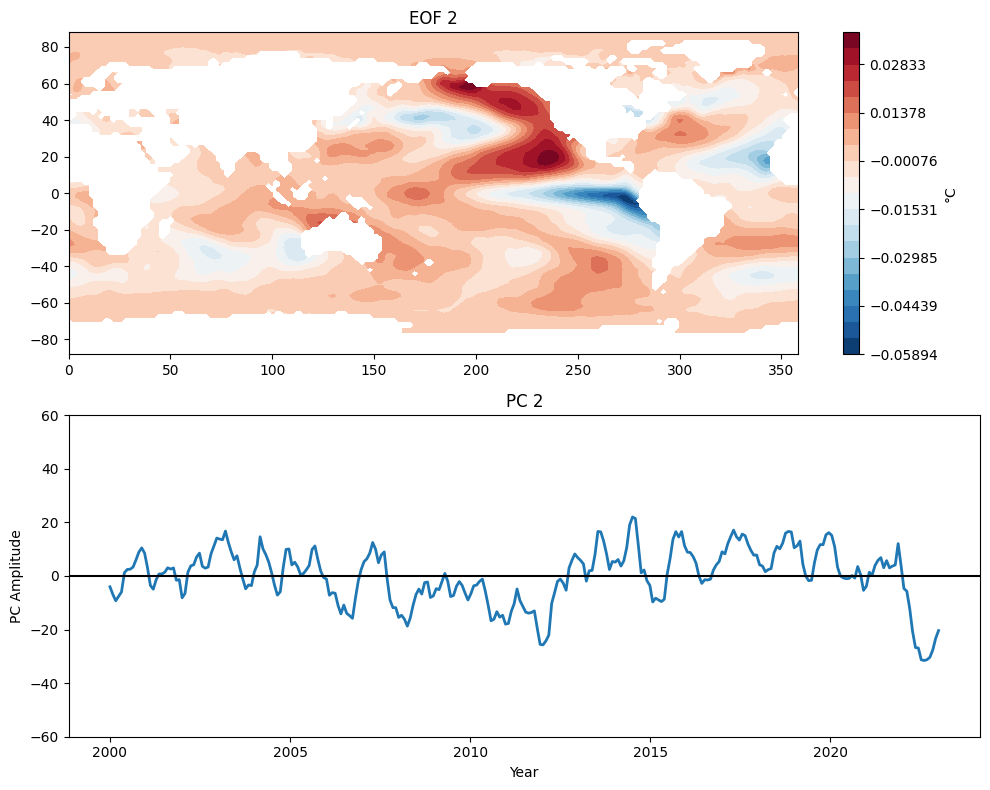

In [8]:
# run the cell

lat = sst_anom.lat.values
lon = sst_anom.lon.values

for i in range(2):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # EOF Plot
    clevs = np.linspace(np.nanmin(eof_sst[i, :, :]), np.nanmax(eof_sst[i, :, :]), 21)
    cs = axs[0].contourf(lon, lat, eof_sst[i, :, :].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    axs[0].set_title(f'EOF {i + 1}')
    cb = fig.colorbar(cs, ax=axs[0])
    cb.set_label('°C')

    # PC Plot
    days = np.linspace(2000, 2023, len(pc_sst[:, i]))
    axs[1].plot(days, pc_sst[:, i], linewidth=2)
    axs[1].axhline(0, color='k')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('PC Amplitude')
    axs[1].set_title(f'PC {i + 1}')
    axs[1].set_ylim([-60, 60]) 

    plt.tight_layout()
    plt.show()


**Explained Variance**: 

Finally, we plot the explained variance of each EOF mode. This plot shows how much of the total variance is captured by each mode. The first few modes typically explain the majority of the variance in the dataset, while higher modes capture smaller, less significant patterns.

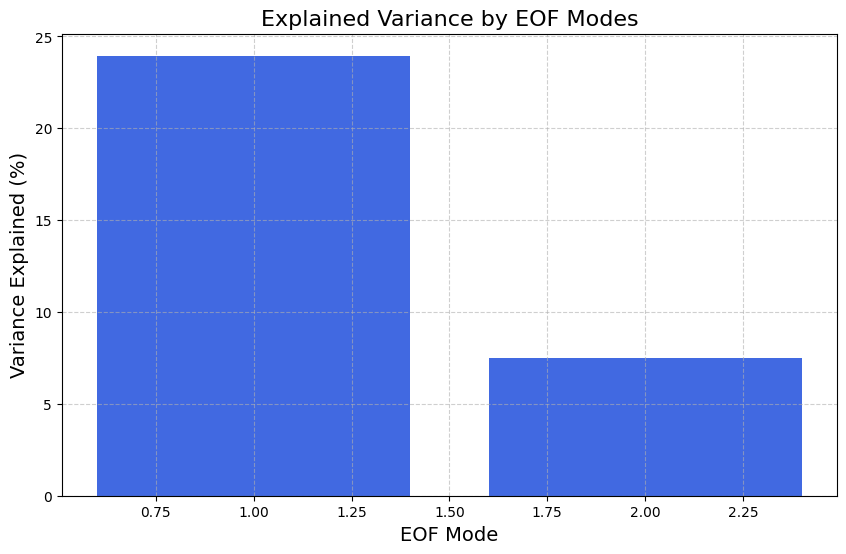

In [17]:
# Get explained variance for each EOF
explained_variance = solver.varianceFraction()

# Plot the explained variance
def plot_explained_variance(explained_variance, n_modes=3):
    """
    Plots the explained variance for the first n EOF modes.
    
    Parameters:
    explained_variance (array): Array of variance fractions explained by each EOF.
    n_modes (int): Number of EOF modes to plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot explained variance as bars
    ax.bar(range(1, n_modes + 1), explained_variance[:n_modes] * 100, color='royalblue')

    # Set labels and title
    ax.set_xlabel('EOF Mode', fontsize=14)
    ax.set_ylabel('Variance Explained (%)', fontsize=14)
    ax.set_title('Explained Variance by EOF Modes', fontsize=16)

    # Show grid for clarity
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.show()

# Call the function to plot the explained variance for the first 3 EOFs
plot_explained_variance(explained_variance, n_modes=2)


### Interpretation:

**EOF Mode 1**: This shows a classic ENSO pattern, similar to the ENSO composites we analyzed in Session 2. The structure represents El Niño and La Niña variability across the tropical Pacific. The PC 1 reflects these events over time.

**EOF Mode 2**: Likely related to the Pacific Decadal Oscillation (PDO), this mode shows a different spatial pattern in the Pacific. The PC 2 shows a longer-term oscillation.


### Conclusion:

The first mode captures ENSO variability and the second possibly relates to the PDO.
In this analysis, we are only looking at 23 years of data, so these patterns might change significantly if we were to analyze longer or shorter time periods. These modes of variability could look very different for other time spans. There is plenty of room for experimentation here—since the original SST data covers more than 100 years, you can use the TimeSeriesAnalyzer class to compute detrended anomalies and run the EOF analysis for different periods and durations to explore how these patterns evolve over time.


## Regional EOF Analysis

Now, we focus specifically on the North Atlantic region by selecting this smaller area and recalculating the EOF analysis. This leads to different results compared to the global analysis, as it isolates the variability within the selected region. Globally, the Pacific Ocean dominates the EOF patterns due to its vast size, but by narrowing our focus, we can better understand the modes of variability in the North Atlantic. Performing the EOF analysis on a smaller region provides insights that are more relevant to that particular area, offering a clearer picture of the local dynamics.

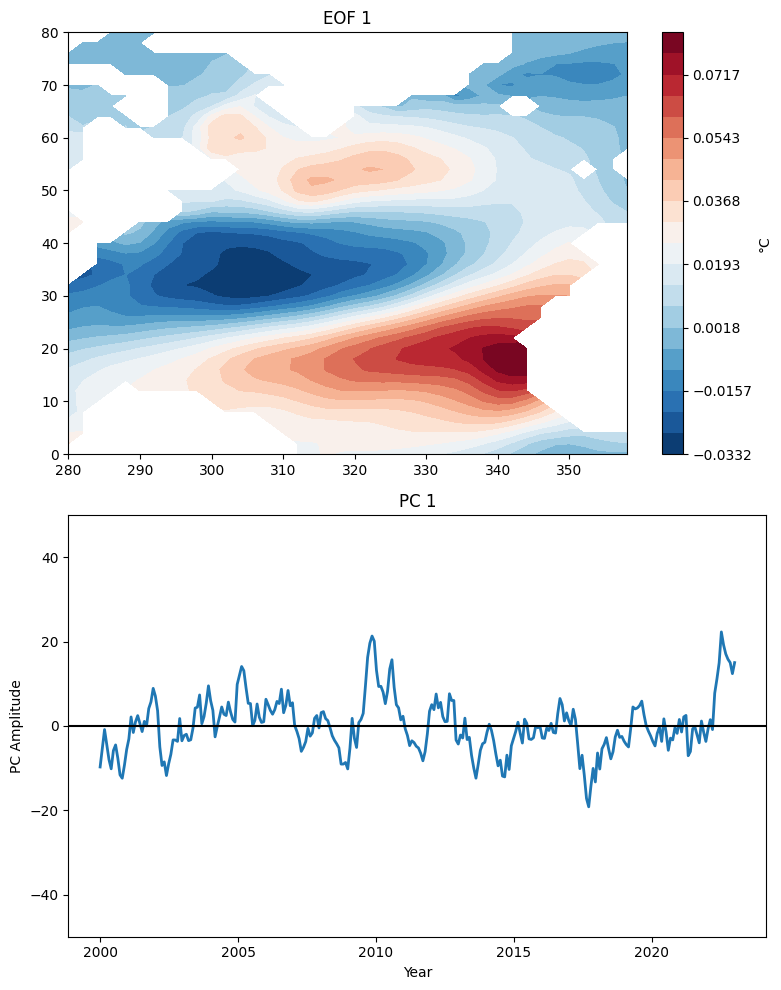

In [9]:
# North Atlantic

sst_anomalies = sst_anom.sel(lat=slice(80,0),lon = slice(280,360))

weights   = np.cos(np.deg2rad(sst_anomalies.lat)).values
weights   = weights.reshape(len(weights), 1)
solver = Eof(sst_anomalies['sst'].values, weights=weights)

eof_NA = solver.eofs(neofs=10)
pc_NA  = solver.pcs(npcs=10, pcscaling=0)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()


lat=sst_anomalies.lat.values
lon= sst_anomalies.lon.values

for i in range(1):
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # EOF Plot
    clevs = np.linspace(np.nanmin(eof_NA[i, :, :]), np.nanmax(eof_NA[i, :, :]), 21)
    cs = axs[0].contourf(lon, lat, eof_NA[i, :, :].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    axs[0].set_title(f'EOF {i + 1}')
    cb = fig.colorbar(cs, ax=axs[0])
    cb.set_label('°C')

    # PC Plot
    days = np.linspace(2000, 2023, len(pc_NA[:, i]))
    axs[1].plot(days, pc_NA[:, i], linewidth=2)
    axs[1].axhline(0, color='k')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('PC Amplitude')
    axs[1].set_title(f'PC {i + 1}')
    axs[1].set_ylim([-50, 50]) 
    plt.tight_layout()
    plt.show()


The first mode resembles a tripole pattern, which studies (e.g. [Andrews et al., 2015](https://iopscience.iop.org/article/10.1088/1748-9326/10/5/054022), [Wu et al.,2024](https://doi.org/10.1007/s00704-023-04762-0)) have shown to be related to the North Atlantic Oscillation (NAO). This pattern is a common feature of North Atlantic variability, where changes in atmospheric pressure associated with the NAO drive fluctuations in sea surface temperature (SST). Further steps could involve examining whether the principal component (PC) is correlated with the NAO index, which would provide additional insight into the relationship between the identified EOF mode and the North Atlantic Oscillation. Additionally, a spatial correlation analysis could be performed to identify the regions where the NAO index has the strongest influence, revealing areas of significant spatial agreement between the EOF patterns and the NAO.

### Sources for EOF Analysis:

[Wu, R., Sun, H. & Wang, Z.(2024)](https://doi.org/10.1007/s00704-023-04762-0). **Individual and combined roles of ENSO and NAO in the development of the North Atlantic tripole SST anomalies during boreal spring.** Theor Appl Climatol 155, 2119–2134 

Wilks, D. S. (2011). **Statistical Methods in the Atmospheric Sciences.**  
- statistical methods in climate science, including EOF analysis.

Von Storch, H., & Zwiers, F. W. (2002). **Statistical Analysis in Climate Research.**
- information on EOF analysis and its applications in climate research.

Jolliffe, I. T. (2002). **Principal Component Analysis.**
- overview of the mathematical basis for EOF analysis (PCA) and its applications across different fields.
    
[Borzelli, G., and R. Ligi (1999)](https://journals.ametsoc.org/view/journals/atot/16/6/1520-0426_1999_016_0682_eofaos_2_0_co_2.xml): Empirical Orthogonal Function Analysis of SST Image Series: A Physical Interpretation. J. Atmos. Oceanic Technol., 16, 682–690, 

Torrence, C., & Compo, G. P. (1998). **A Practical Guide to Wavelet Analysis.**
- it helps with understanding variance decomposition.

[The eofs Python Library Documentation.](https://ajdawson.github.io/eofs/latest/)
Documentation for the eofs library, which is used for implementing EOF analysis in Python.

[GitHub Repository: Practical Application on Climate Variability Studies](https://github.com/royalosyin/Python-Practical-Application-on-Climate-Variability-Studies/tree/master)
- This GitHub repository contains practical examples and applications of EOF analysis and other techniques in climate variability studies. 

